In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('train.csv')
weather = pd.read_csv('weather.csv')
train_weather = pd.merge(weather, train, how= "inner", left_on='Date', right_on='Date')


In [3]:
train_weather.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed', u'Address',
       u'Species', u'Block', u'Street', u'Trap', u'AddressNumberAndStreet',
       u'Latitude', u'Longitude', u'AddressAccuracy', u'NumMosquitos',
       u'WnvPresent'],
      dtype='object')

In [4]:
train_weather = train_weather.applymap(lambda x: np.nan if x == 'M' else x)

train_weather['PrecipTotal'].replace(regex=True,inplace=True,to_replace=r'T',value=0.005)

In [5]:
train_weather.Tavg.fillna(method='pad', inplace=True)

train_weather.Tavg.fillna(method='pad', inplace=True)

train_weather.DewPoint.fillna(method='pad', inplace=True)

train_weather.WetBulb.fillna(method='pad', inplace=True)

train_weather.Heat.fillna(method='pad', inplace=True)

train_weather.Cool.fillna(method='pad', inplace=True)

train_weather.PrecipTotal.fillna(method='pad', inplace=True)

train_weather.StnPressure.fillna(method='pad', inplace=True)

train_weather.SeaLevel.fillna(method='pad', inplace=True)

train_weather.AvgSpeed.fillna(method='pad', inplace=True)


In [36]:
train_weather.drop(["Depth", "Water1", "SnowFall",'Depart', 'CodeSum', 'Sunset', 'Sunrise', 'WetBulb','ResultSpeed','SeaLevel'], inplace=True, axis=1)

In [6]:
train_weather['Heat'] = [float(x) for x in train_weather.Heat]

train_weather['Cool'] = [float(x) for x in train_weather.Cool]

train_weather['StnPressure'] = [float(x) for x in train_weather.StnPressure]

train_weather['AvgSpeed'] = [float(x) for x in train_weather.AvgSpeed]

train_weather['PrecipTotal'] = [float(x) for x in train_weather.PrecipTotal]


In [7]:
train_weather.isnull().sum()

Station                       0
Date                          0
Tmax                          0
Tmin                          0
Tavg                          0
Depart                    10506
DewPoint                      0
WetBulb                       0
Heat                          0
Cool                          0
Sunrise                       0
Sunset                        0
CodeSum                       0
Depth                     10506
Water1                    21012
SnowFall                  10506
PrecipTotal                   0
StnPressure                   0
SeaLevel                      0
ResultSpeed                   0
ResultDir                     0
AvgSpeed                      0
Address                       0
Species                       0
Block                         0
Street                        0
Trap                          0
AddressNumberAndStreet        0
Latitude                      0
Longitude                     0
AddressAccuracy               0
NumMosqu

In [39]:
train_weather.dtypes

Station                     int64
Date                       object
Tmax                        int64
Tmin                        int64
Tavg                       object
DewPoint                    int64
Heat                      float64
Cool                      float64
PrecipTotal               float64
StnPressure               float64
ResultDir                   int64
AvgSpeed                  float64
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

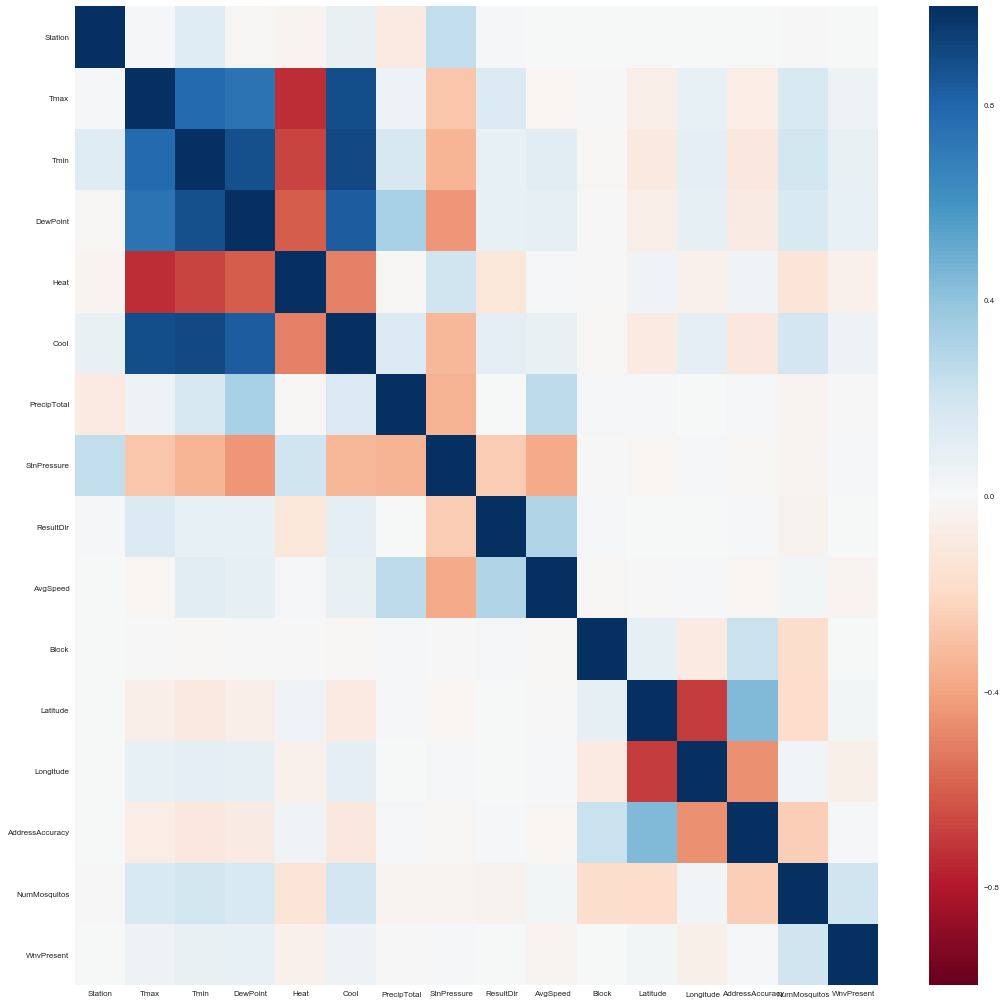

In [40]:
sns.set()
sns.set_context("paper")
plt.figure(figsize=(18, 18))
sns.heatmap(train_weather.corr(), cmap="RdBu")

In [29]:
train_weather.to_csv('Clean_Merge_Train_WeatherIII.csv', index=False)

In [8]:
train_weather.to_csv('Dirty_Merge_Train_Weather.csv', index=False)